**AIML - CAPSTONE PROJECT : OBJECT DETECTION - CAR**

---



**PROBLEM STATEMENT**


**DOMAIN:** Automotive Surveillance.

**• CONTEXT:**

Computer vision can be used to automate supervision and generate action appropriate action trigger if the event is
predicted from the image of interest. For example a car moving on the road can be easily identified by a camera as make of
the car, type, colour, number plates etc.

**• DATA DESCRIPTION:**

The Cars dataset contains 16,185 images of 196 classes of cars. The data is split into 8,144 training images and 8,041 testing
images, where each class has been split roughly in a 50-50 split. Classes are typically at the level of Make, Model, Year, e.g.
2012 Tesla Model S or 2012 BMW M3 coupe.

**Data description:**

‣ Train Images: Consists of real images of cars as per the make and year of the car.
‣ Test Images: Consists of real images of cars as per the make and year of the car.

‣ Train Annotation: Consists of bounding box region for training images.

‣ Test Annotation: Consists of bounding box region for testing images.

Dataset has been attached along with this project.
Please use the same for this capstone project.
Original link to the dataset for your reference only: https://www.kaggle.com/jutrera/stanford-car-dataset-by-classes-folder [ for your
reference only ]

**Reference:** 3D Object Representations for Fine-Grained Categorisation, Jonathan Krause, Michael Stark, Jia Deng, Li Fei-Fei 4th IEEE
Workshop on 3D Representation and Recognition, at ICCV 2013 (3dRR-13). Sydney, Australia. Dec. 8, 2013.


**• PROJECT OBJECTIVE:** Design a DL based car identification model.

**• PROJECT TASK:** [ Score: 100 points]

**1. Milestone 1: [ Score: 40 points]**

‣ Input: Context and Dataset

‣ Process:

‣ Step 1: Import the data. [ 3 points ]

‣ Step 2: Map training and testing images to its classes. [ 6 points ]

‣ Step 3: Map training and testing images to its annotations. [ 6 points ]

‣ Step 4: Display images with bounding box. [ 5 points ]

‣ Step 5: Design, train and test basic CNN models to classify the car. [ 10 points ]

‣ Step 6: Interim report [ 10 points ]

‣ Submission: Interim report, Jupyter Notebook with all the steps in Milestone-1

**2. Milestone 2: [ Score: 60 points]**

‣ Input: Preprocessed output from Milestone-1

‣ Process:

‣ Step 1: Fine tune the trained basic CNN models to classify the car. [ 5
          points ]

‣ Step 2: Design, train and test RCNN & its hybrids based object detection
          models to impose the bounding box or
          mask over the area of interest. [ 10 points ]

‣ Step 3: Pickle the model for future prediction [ 5 Points]

‣ Step 4: Final Report [40 Points]

‣ Submission: Final report, Jupyter Notebook with all the steps in
              Milestone-1 and Milestone-2

**3. Milestone 3: [ Optional ]**

‣ Process:

‣ Step 1: Design a clickable UI based interface which can allow the user   
to browse & input the image, output the class
and the bounding box or mask [ highlight area of interest ] of the input image

‣ Submission: Final report, Jupyter Notebook with the addition of clickable UI based interface

**‣ References and hints:**
‣ Please refer to the blog to understand the basics of object detection: https://www.mygreatlearning.com/blog/object-detection-using-tensorflow/
‣ YOLO object detection using OpenCV: https://www.mygreatlearning.com/blog/yolo-object-detection-using-opencv/?highlight=detection
‣ Face detection: https://www.mygreatlearning.com/blog/face-recognition/?highlight=detection
‣ To make GUI as a desk app you can use TKINTER library. You are free to use any other library.
‣ To make web service GUI you can use FLASK or DJANGO library


**POINTS TO REMEMBER**
1. A maximum of 100 points will be awarded for this project
2. Project to be submitted within 6 weeks of date of release. Late submission will be accepted under
genuine situation. Score will be given as per the below formula:
If the current score is greater than 40 then the final score will be capped at 40.
Else the current score will be awarded.
3. Any form of plagiarism is strictly prohibited. No score will be awarded in this case.

**Milestone 1:**                       [ Score: 40 points]

‣ Input: Context and Dataset

**‣ Process:**

**‣ Step 1:** Import the data. [ 3 points ]

**‣ Step 2:** Map training and testing images to its classes. [ 6 points ]

**‣ Step 3:** Map training and testing images to its annotations. [ 6 points ]

**‣ Step 4:** Display images with bounding box. [ 5 points ]

**‣ Step 5:** Design, train and test basic CNN models to classify the car. [ 10 points ]

**‣ Step 6**: Interim report [ 10 points ]



In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**‣ Step 1:** Import the data. [ 3 points ]

In [ ]:
import zipfile
import os

# Define the path to the zip file and the directory to extract to
# Make sure 'Car Images.zip' is the actual name of your zip file
zip_path = '/content/drive/My Drive/CAPSTONE-PROJECT/Car Images.zip'
extract_dir = '/content/drive/My Drive/CAPSTONE-PROJECT'

# Extract the contents
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Extracted all files to {extract_dir}")

Extracted all files to /content/drive/My Drive/CAPSTONE-PROJECT


**Step 2:** Map Training and Testing Images to Their Classes

In [ ]:
import os

extract_dir = '/content/drive/My Drive/CAPSTONE-PROJECT/Car Images'

# Define the directories for training and testing images
train_dir = os.path.join(extract_dir, 'Train Images')
test_dir = os.path.join(extract_dir, 'Test Images')

# Function to map images to classes
def map_images_to_classes(image_dir):
    image_class_map = {}
    for class_name in os.listdir(image_dir):
        class_path = os.path.join(image_dir, class_name)
        if os.path.isdir(class_path):
            for image_name in os.listdir(class_path):
                image_path = os.path.join(class_path, image_name)
                image_class_map[image_path] = class_name
    return image_class_map

# Map training and testing images
train_image_class_map = map_images_to_classes(train_dir)
test_image_class_map = map_images_to_classes(test_dir)

print(f"Number of training images: {len(train_image_class_map)}")
print(f"Number of testing images: {len(test_image_class_map)}")


Number of training images: 8144
Number of testing images: 8041


In [ ]:
import pandas as pd
import os

# Load annotations using pandas
train_annotations_df = pd.read_csv('/content/drive/MyDrive/CAPSTONE-PROJECT/Train Annotations.csv')
test_annotations_df = pd.read_csv('/content/drive/MyDrive/CAPSTONE-PROJECT/Test Annotation.csv')

# Display the first few rows and columns of the annotations to understand the structure
print(train_annotations_df.head())
print(train_annotations_df.columns)
print(test_annotations_df.head())
print(test_annotations_df.columns)

# Load the CSV files without headers
#train_annotations = pd.read_csv(train_annotations_df, header=None)
#test_annotations = pd.read_csv(test_annotations_df, header=None)

# Assign column names manually
train_annotations_df.columns = ['image_name', 'x_min', 'y_min', 'x_max', 'y_max', 'image_class']
test_annotations_df.columns = ['image_name', 'x_min', 'y_min', 'x_max', 'y_max', 'image_class']

#print(f"Number of training annotations: {len(train_image_annotation_map)}")
#print(f"Number of testing annotations: {len(test_image_annotation_map)}")



  Image Name  Bounding Box coordinates  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
0  00001.jpg                        39         116         569         375   
1  00002.jpg                        36         116         868         587   
2  00003.jpg                        85         109         601         381   
3  00004.jpg                       621         393        1484        1096   
4  00005.jpg                        14          36         133          99   

   Image class  
0           14  
1            3  
2           91  
3          134  
4          106  
Index(['Image Name', 'Bounding Box coordinates', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Image class'],
      dtype='object')
  Image Name  Bounding Box coordinates  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
0  00001.jpg                        30          52         246         147   
1  00002.jpg                       100          19         576         203   
2  00003.jpg                        51         105         

In [ ]:
train_annotations_df

,image_name,x_min,y_min,x_max,y_max,image_class
0,00001.jpg,39,116,569,375,14
1,00002.jpg,36,116,868,587,3
2,00003.jpg,85,109,601,381,91
3,00004.jpg,621,393,1484,1096,134
4,00005.jpg,14,36,133,99,106
...,...,...,...,...,...,...
8139,08140.jpg,3,44,423,336,78
8140,08141.jpg,138,150,706,523,196
8141,08142.jpg,26,246,660,449,163
8142,08143.jpg,78,526,1489,908,112


**Step 3:** Map Training and Testing Images to Their Annotations

In [ ]:
import pandas as pd
import os

# Load annotations using pandas
train_annotations_df = pd.read_csv('/content/drive/MyDrive/CAPSTONE-PROJECT/Train Annotations.csv')
test_annotations_df = pd.read_csv('/content/drive/MyDrive/CAPSTONE-PROJECT/Test Annotation.csv')

# Display the first few rows and columns of the annotations to understand the structure
print(train_annotations_df.head())
print(train_annotations_df.columns)
print(test_annotations_df.head())
print(test_annotations_df.columns)

# Map images to their annotations
train_image_annotation_map = {
    row['Image Name']: (row['Bounding Box coordinates'], row['Unnamed: 2'], row['Unnamed: 3'], row['Unnamed: 4'])
    for _, row in train_annotations_df.iterrows()
}
test_image_annotation_map = {
    row['Image Name']: (row['Bounding Box coordinates'], row['Unnamed: 2'], row['Unnamed: 3'], row['Unnamed: 4'])
    for _, row in test_annotations_df.iterrows()
}

print(f"Number of training annotations: {len(train_image_annotation_map)}")
print(f"Number of testing annotations: {len(test_image_annotation_map)}")

  Image Name  Bounding Box coordinates  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
0  00001.jpg                        39         116         569         375   
1  00002.jpg                        36         116         868         587   
2  00003.jpg                        85         109         601         381   
3  00004.jpg                       621         393        1484        1096   
4  00005.jpg                        14          36         133          99   

   Image class  
0           14  
1            3  
2           91  
3          134  
4          106  
Index(['Image Name', 'Bounding Box coordinates', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Image class'],
      dtype='object')
  Image Name  Bounding Box coordinates  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
0  00001.jpg                        30          52         246         147   
1  00002.jpg                       100          19         576         203   
2  00003.jpg                        51         105         

**Step 4:** Display images with bounding box. [ 5 points ]

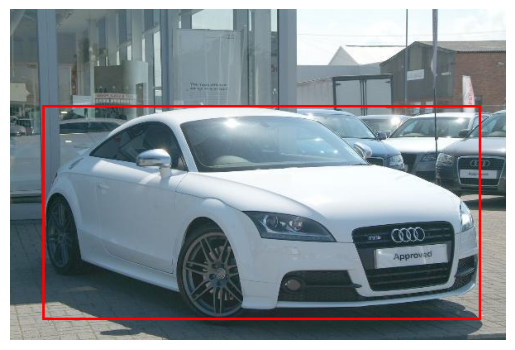

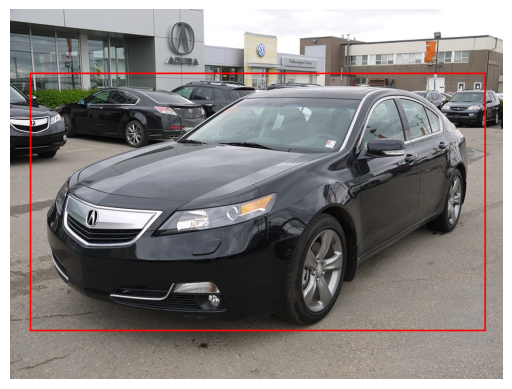

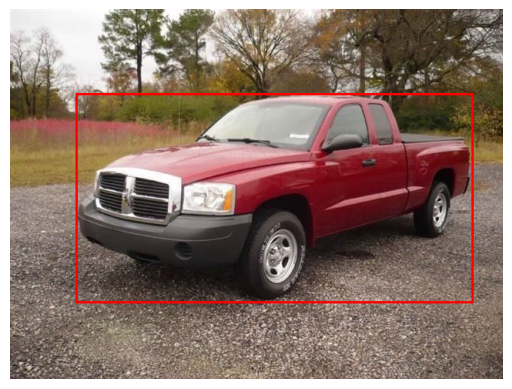

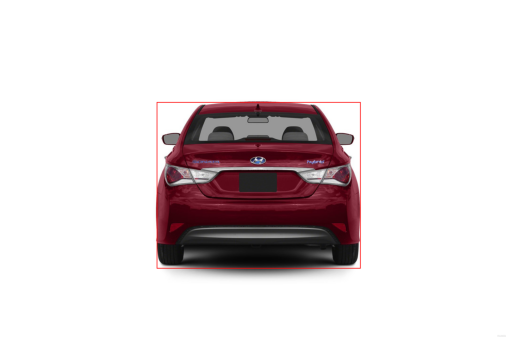

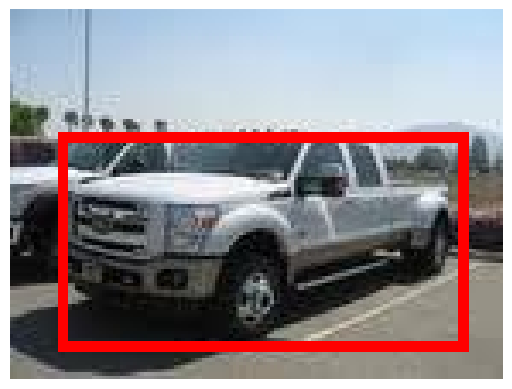

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

# Define the directory containing the extracted data
extract_dir = '/content/drive/MyDrive/CAPSTONE-PROJECT'

# Define paths to annotation files
train_annotations_path = os.path.join(extract_dir, 'Train Annotations.csv')
test_annotations_path = os.path.join(extract_dir, 'Test Annotation.csv')

# Define the root directory containing the images
train_images_root_dir = '/content/drive/MyDrive/CAPSTONE-PROJECT/Car Images/Train Images'
test_images_root_dir = '/content/drive/MyDrive/CAPSTONE-PROJECT/Car Images/Test Images'

# Load annotations using pandas
train_annotations_df = pd.read_csv(train_annotations_path)
test_annotations_df = pd.read_csv(test_annotations_path)

# Function to draw bounding boxes on an image
def draw_bounding_box(image_path, bbox):
    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)
    draw.rectangle(bbox, outline='red', width=3)
    return image

# Function to search for an image file in subdirectories
def find_image_path(image_name, search_dir):
    for root, dirs, files in os.walk(search_dir):
        if image_name in files:
            return os.path.join(root, image_name)
    return None

# Display an example image with bounding box
def display_image_with_bbox(image_name, bbox, search_dir):
    image_path = find_image_path(image_name, search_dir)
    if image_path:
        image_with_bbox = draw_bounding_box(image_path, bbox)
        plt.imshow(image_with_bbox)
        plt.axis('off')  # Hide the axis
        plt.show()
    else:
        print(f"Image not found: {image_name}")

train_annotations_df.columns = ['image_name', 'x_min', 'y_min', 'x_max', 'y_max', 'image_class']

# Iterate over the rows of the DataFrame instead of columns
for _, row in train_annotations_df.head().iterrows(): # Use .iterrows() to iterate over DataFrame rows
    image_name = row['image_name']
    bbox = (row['x_min'], row['y_min'], row['x_max'], row['y_max']) # Extract bounding box coordinates
    display_image_with_bbox(image_name, bbox, train_images_root_dir)


**Step 5:** Design, train and test basic CNN models to classify the car. [ 10 points ]

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_dir = '/content/drive/MyDrive/CAPSTONE-PROJECT/Car Images/Train Images'
test_dir = '/content/drive/MyDrive/CAPSTONE-PROJECT/Car Images/Test Images'

# Create data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)


Found 8144 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.


**Define the CNN Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Output layer with the number of classes
])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 196)                 │          25,284 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 856,068 (3.27 MB)

 Trainable params: 856,068 (3.27 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
num_classes = 196
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')  # Set the correct number of output classes
])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 196)                 │          25,284 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,417,604 (28.30 MB)

 Trainable params: 7,417,604 (28.30 MB)

 Non-trainable params: 0 (0.00 B)

**Compile the Model**

In [ ]:
#Compile the model with an appropriate optimizer, loss function, and metrics:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


**Train the Model**

In [ ]:
# Train the model using the data generators:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)


Epoch 1/30
254/254 ━━━━━━━━━━━━━━━━━━━━ 465s 2s/step - accuracy: 0.0054 - loss: 5.2832 - val_accuracy: 0.0142 - val_loss: 5.1639
Epoch 2/30
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 372us/step - accuracy: 0.0000e+00 - loss: 5.1801 - val_accuracy: 0.0000e+00 - val_loss: 4.6898
Epoch 3/30
254/254 ━━━━━━━━━━━━━━━━━━━━ 498s 2s/step - accuracy: 0.0168 - loss: 5.1364 - val_accuracy: 0.0232 - val_loss: 5.0672
Epoch 4/30
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 357us/step - accuracy: 0.0000e+00 - loss: 5.0713 - val_accuracy: 0.1111 - val_loss: 4.9636
Epoch 5/30
254/254 ━━━━━━━━━━━━━━━━━━━━ 495s 2s/step - accuracy: 0.0344 - loss: 4.9719 - val_accuracy: 0.0306 - val_loss: 4.9887
Epoch 6/30
254/254 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - accuracy: 0.0312 - loss: 4.7572 - val_accuracy: 0.0000e+00 - val_loss: 5.4863
Epoch 7/30
254/254 ━━━━━━━━━━━━━━━━━━━━ 448s 2s/step - accuracy: 0.0637 - loss: 4.6785 - val_accuracy: 0.0444 - val_loss: 4.9409
Epoch 8/30
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 462us/step - accuracy: 0.0312 - los

**Evaluate the Model**

In [ ]:
# Evaluate on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test accuracy: {test_acc:.2f}")

# Evaluate on the training set
train_loss, train_acc = model.evaluate(train_generator, steps=train_generator.samples // train_generator.batch_size)
print(f"Train accuracy: {train_acc:.2f}")


**Plot Training History**

Plot training and validation accuracy/loss:

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
